In [624]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.datasets import electrocardiogram
from scipy.signal import find_peaks, argrelmin, find_peaks_cwt
import pandas as pd
from collections import Counter
from scipy import signal


In [625]:
from sklearn.linear_model import SGDRegressor 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error 


from sklearn.pipeline import make_pipeline


In [626]:
path = "/Users/cslinxs/Desktop/all_weeks/aurorabp-sample-data/sample/measurements_auscultatory/a001/a001.initial.Calibration_start_3.tsv"
path = "/Users/cslinxs/Desktop/all_weeks/aurorabp-sample-data/sample/measurements_auscultatory/a002/a002.initial.Static_seated_challenge_1.tsv"
#path ="/Users/cslinxs/Desktop/all_weeks/aurorabp-sample-data/sample/measurements_auscultatory/a004/a004.initial.Exercise_challenge_start_1.tsv"
#path = "/Users/cslinxs/Desktop/all_weeks/aurorabp-sample-data/sample/measurements_auscultatory/a000/a000.initial.Static_challenge_start_1.tsv"


#path ="/Users/cslinxs/Desktop/all_weeks/aurorabp-sample-data/sample/measurements_auscultatory/a000/a000.initial.Static_seated_challenge_1.tsv"

path ="/Users/cslinxs/Desktop/aurora_dataset/aurora_dataset/measurements_auscultatory/a084/a084.initial.Calibration_start_1.tsv"



##############
#bad keys

bad_keys = ['measurements_auscultatory/a064/a064.initial.Static_seated_challenge_1.tsv', 'measurements_auscultatory/a150/a150.return.Temporal_challenge_start_3.tsv', 'measurements_auscultatory/a328/a328.initial.Exercise_challenge_start_1.tsv', 'measurements_auscultatory/a578/a578.initial.Static_challenge_start_1.tsv', 'measurements_auscultatory/a596/a596.initial.Exercise_challenge_start_1.tsv', 'measurements_auscultatory/a642/a642.initial.Exercise_challenge_start_1.tsv', 'measurements_auscultatory/a648/a648.initial.Seated_calibration_1.tsv', 'measurements_auscultatory/a437/a437.initial.Exercise_challenge_start_2.tsv', 'measurements_auscultatory/a437/a437.return.Temporal_seated_challenge_2.tsv']
path = "/Users/cslinxs/Desktop/aurora_dataset/aurora_dataset/"+bad_keys[7]

In [627]:
def reject_outliers(data):
    return data[abs(data - np.mean(data)) <3 * np.std(data)]

In [628]:
# df = pd.read_csv(path,sep = '\t')   
# pos_pressure = df["pressure"]

# for i in range(80,200,10):

#     neglist = [ -x for x in pos_pressure]

#     min_peaks, _ = find_peaks(neglist, prominence=10, width=100 )


#     plt.plot(pos_pressure)
#     plt.plot(min_peaks, pos_pressure[min_peaks], "x")
#     plt.title(f"mins {i} pro w/ len {len(min_peaks)}")
#     plt.show()

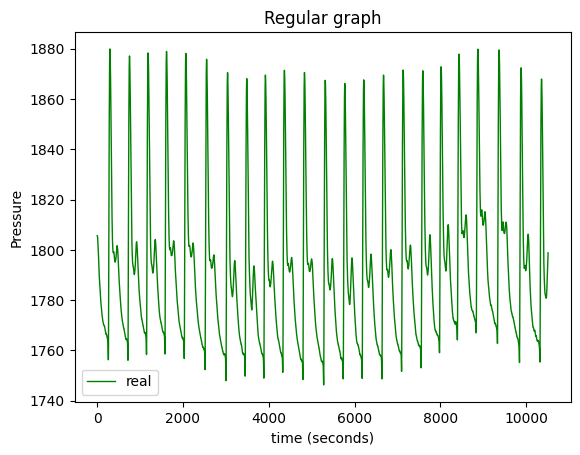

In [629]:
df = pd.read_csv(path,sep = '\t')   
pos_pressure = df["pressure"]




plt.plot(pos_pressure,  linewidth=1, label='real', color= "green")

plt.title("Regular graph")
plt.legend(loc='best')
plt.ylabel("Pressure")
plt.xlabel("time (seconds)")
plt.show()

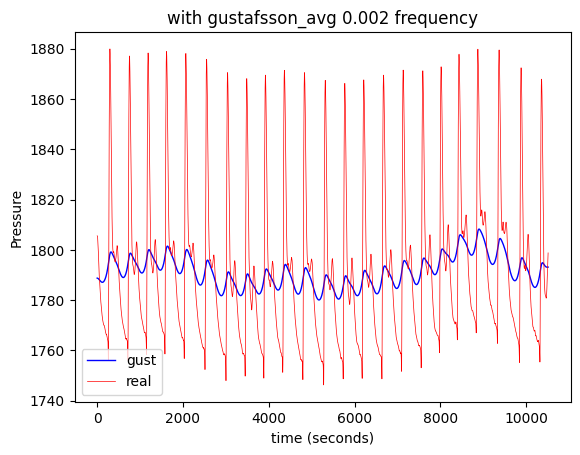

In [630]:
df = pd.read_csv(path,sep = '\t')   
pos_pressure = df["pressure"]


b, a = signal.butter(1, 0.002, analog=False)
gustafsson_avg = signal.filtfilt(b, a, x= pos_pressure, method="gust")
plt.plot(gustafsson_avg, 'b-', linewidth=1, label='gust')
plt.plot(pos_pressure,  linewidth=0.5, label='real', color= "red")

plt.title("with gustafsson_avg 0.002 frequency")
plt.legend(loc='best')
plt.ylabel("Pressure")
plt.xlabel("time (seconds)")
plt.show()

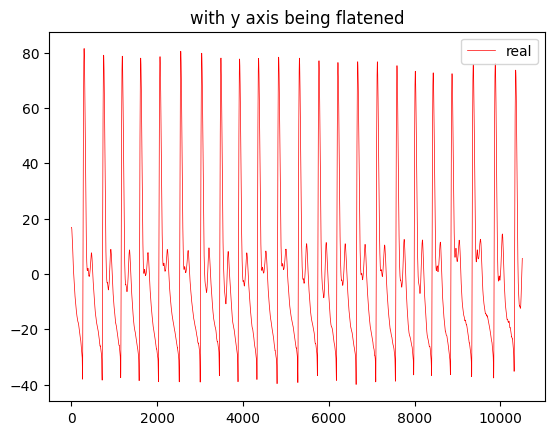

In [631]:
##flat it out with HZ as 0.002

y_flater = [real_pre-abs( guston_avg) for real_pre, guston_avg in zip(pos_pressure, gustafsson_avg)]

plt.plot(y_flater,  linewidth=0.5, label='real', color= "red")

plt.title("with y axis being flatened")
plt.legend(loc='best')
plt.show()

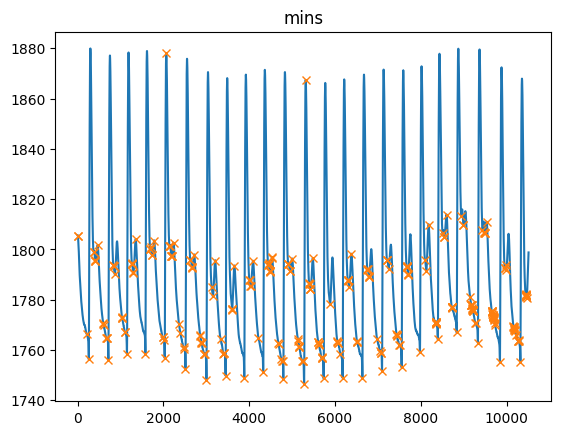

In [632]:

df = pd.read_csv(path,sep = '\t')   
pos_pressure = df["pressure"]

neglist = [ -x for x in y_flater]

min_peaks, _ = find_peaks(neglist)


plt.plot(pos_pressure)
plt.plot(min_peaks, pos_pressure[min_peaks], "x")
plt.title("mins")
plt.show()


121.42818622604182 24.285637245208363
hiii 9.57083377749234


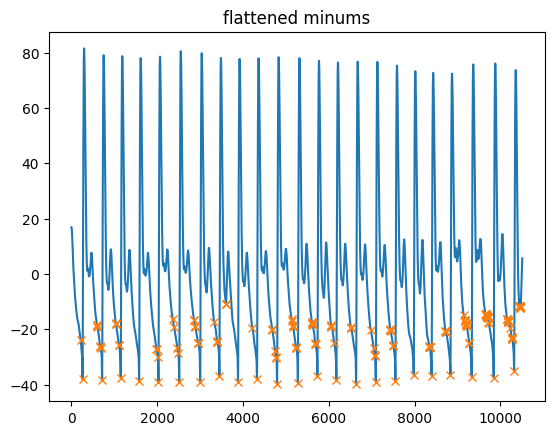

In [633]:

# df = pd.read_csv(path,sep = '\t')   
# pos_pressure = df["pressure"]
y_flater = np.array(y_flater)
neglist = [ -x for x in y_flater]

neg_max_values = max(neglist)
neg_mix_values = min(neglist)
mid_neg_value= neg_max_values - neg_mix_values
print(mid_neg_value, mid_neg_value*0.20)

min_height = neg_max_values - mid_neg_value*0.25 
print("hiii",min_height )

min_peaks, _ = find_peaks(neglist , height= min_height)


plt.plot(y_flater)
plt.plot(min_peaks, y_flater[min_peaks], "x")
plt.title("flattened minums")
plt.show()


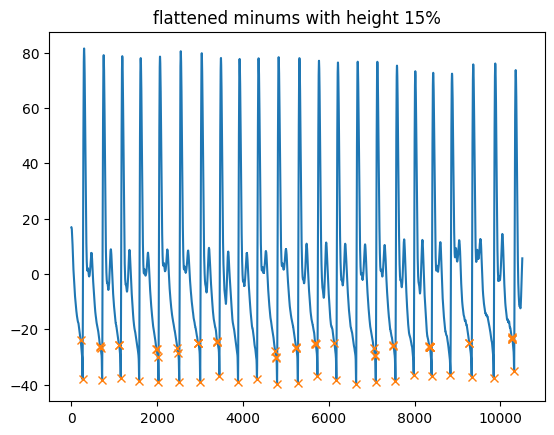

In [634]:

# df = pd.read_csv(path,sep = '\t')   
# pos_pressure = df["pressure"]

y_flater = [real_pre-abs( guston_avg) for real_pre, guston_avg in zip(pos_pressure, gustafsson_avg)]

y_flater = np.array(y_flater)
neglist = [ -x for x in y_flater]

neg_max_values = max(neglist)
neg_mix_values = min(neglist)
mid_neg_value= neg_max_values - neg_mix_values

min_height = neg_max_values - mid_neg_value*0.15 

min_peaks, _ = find_peaks(neglist , height= min_height)


plt.plot(y_flater)
plt.plot(min_peaks, y_flater[min_peaks], "x")
plt.title("flattened minums with height 15%")
plt.show()


<class 'numpy.ndarray'>


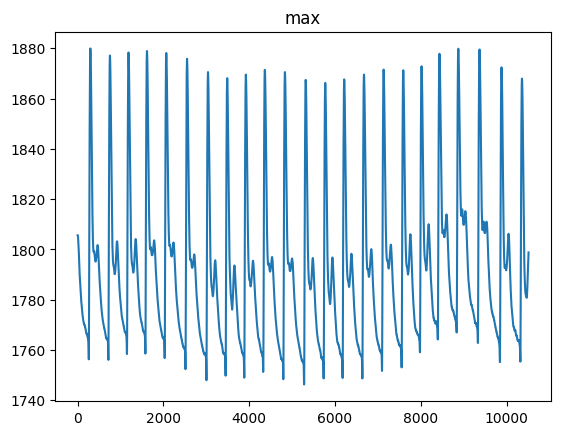

In [635]:

df = pd.read_csv(path,sep = '\t')   
pos_pressure = df["pressure"]


max_peak, _ = find_peaks(pos_pressure, prominence=10,width=90
                         )

plt.plot(pos_pressure)
print(type(max_peak))
plt.plot(max_peak, pos_pressure[max_peak], "x")
plt.title("max")

plt.show()

In [636]:
#this is so i can see the diffrences in the graph widths
diffrences_min = np.diff(min_peaks)
mean_min = float(diffrences_min.mean())

diffrences_max = np.diff(max_peak)
mean_max = float(diffrences_max.mean())


print(mean_min,mean_max )

150.82089552238807 nan


/var/folders/hp/g2knsnlj4y18ybnh9bjz7rkh0000gp/T/ipykernel_35884/3200954943.py:6: RuntimeWarning: Mean of empty slice.
  mean_max = float(diffrences_max.mean())
/Users/cslinxs/Library/Python/3.9/lib/python/site-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [637]:
#this edeleuets all elemerns with in 40 of the mini
need_to_go  = []

set_max_peak = set(max_peak)
for mini in list(min_peaks):
    if len(set(range(mini-40,40+mini)).intersection(set_max_peak))>0:
        need_to_go.append(int(mini))

combo_list =  list(min_peaks)+ (need_to_go)
combo_list = [int(i) for i in combo_list]

# juts deleted stuff from both lists if its in tht 40 range
new_mins = [k for k,v in Counter(combo_list).items() if v==1]



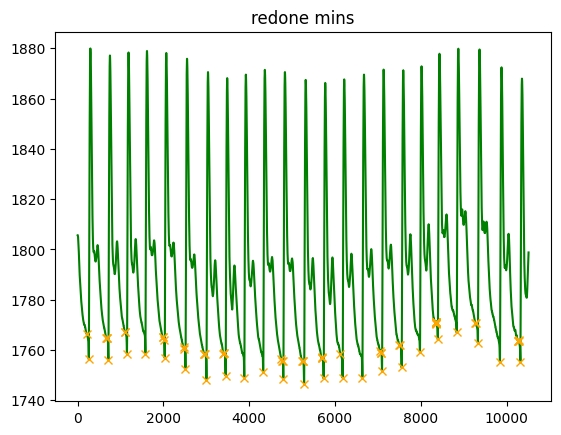

In [638]:

#fileted ghrough mins
df = pd.read_csv(path,sep = '\t')   
pos_pressure = df["pressure"]


plt.plot(pos_pressure, color="green")


newst_mins= np.asarray(list(new_mins), dtype=np.float32)

plt.plot(newst_mins, pos_pressure[newst_mins], "x", color="orange")
plt.title("redone mins")

plt.show()

This the diffrence in means:

In [639]:
#print(min_peaks,peaks)
diffrences_min = np.diff(min_peaks)

mean_min = float(diffrences_min.mean())

diffrences_max = np.diff(max_peak)

mean_max = float(diffrences_max.mean())


diffrences_new_min = np.diff(newst_mins)

mean_new_min = float(diffrences_new_min.mean())


print(mean_min,mean_max,mean_new_min )


150.82089552238807 nan 150.82089233398438


/var/folders/hp/g2knsnlj4y18ybnh9bjz7rkh0000gp/T/ipykernel_35884/769696284.py:8: RuntimeWarning: Mean of empty slice.
  mean_max = float(diffrences_max.mean())
/Users/cslinxs/Library/Python/3.9/lib/python/site-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [640]:
diffrences_new_min

array([ 45., 408.,   5.,   7.,  37., 390.,   6.,  36., 430., 403.,   4.,
        26.,  17., 442.,  17.,  26., 440.,   2.,   4.,  42., 396.,   3.,
         4.,  44., 435., 441., 422.,  25.,   5.,  17., 443.,   6.,   3.,
        33., 406.,   4.,   6.,  39., 391.,  52., 460., 411.,  22.,   5.,
        20., 405.,   5.,  47., 427., 364.,   3.,   2.,   2.,   3.,   3.,
         3.,  38., 438., 439.,   2.,  54., 514., 418.,   8.,   7.,   4.,
        39.], dtype=float32)

In [641]:
# here i think if i get the stats of the list i can ssee if something is weird and drop the point
#  BUTTTT HERE IS WHERE I SEE WHAT POINT HAS TO GO

def get_stats(check_list):
    standard = float(np.std(check_list))
    mean = float(np.mean(check_list))
    return [min(check_list),mean-standard-standard,mean-standard,mean,mean + standard,mean +standard+standard ,max(check_list) ]
get_stats(diffrences_new_min)[5]

535.0054016113281

here is where i wanna remvoe the things tooo far away frommthe mena

so i will say noise is when the chatr is showing a beat within 20 mins of another

if something is 20+- another beat in the other list it is removed

[[0], [1], [1], [0], [0], [1], [1], [1], [1], [1], [2], [2], [2], [2], [2], [3], [2], [2], [2], [2], [3], [3], [3], [3], [3], [4], [4], [4], [4], [3], [4], [4], [4], [4], [4], [5], [5], [4], [3], [3], [3], [2], [0], [0], [0], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []

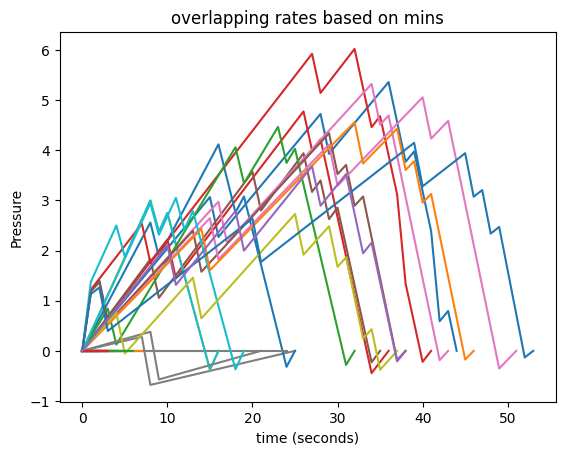

In [642]:
all_overlaps = [[] for i in range(int(max(diffrences_new_min)))]

df = pd.read_csv(path,sep = '\t')   
pos_pressure = df["pressure"]

newst_mins= np.asarray(list(new_mins), dtype=np.float32)

mini_list = list(newst_mins)

for i in range(len(mini_list)-1):

    if (int(mini_list[i+1]) -int(mini_list[i]))< get_stats(diffrences_new_min)[4] :
        y_range  = list(range(int(mini_list[i]),int(mini_list[i+1])))
        y_of_shift = [int(y - min(pos_pressure[y_range])) for y in pos_pressure[y_range]]

        x_range = list(range(int(mini_list[i]),int(mini_list[i+1])))
        x_of_shift = [int(x - x_range[0]) for x in x_range]
        start_end_line = np.linspace(y_of_shift[0], y_of_shift[-1], len(y_of_shift), endpoint=True)

        y_rotated = [xi - yi for xi, yi in zip(y_of_shift, start_end_line)]


        for x_indi in range(len(x_range)):
            #print(x_indi)
            #all_overlaps[x_indi].append(
            all_overlaps[x_indi].append(int(y_of_shift[x_indi]-start_end_line[x_indi]))
        
        # um all_overlaps and y_rotated does the same thing... i think, it is but it has some error
        print(all_overlaps)
        #plt.plot(start_end_line)
        

        plt.plot(x_of_shift, y_rotated)



plt.title("overlapping rates based on mins")
plt.ylabel("Pressure")
plt.xlabel("time (seconds)")

plt.show()

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1], [1, 0, 1, 1, 0, 2, 0, 1, 2, 1, 0, 2, 0, 1, 1, 0, 2, 1, 0, 0, 0, 0, 1], [1, 1, 1, 0, 2, 0, 2, 2, 1, 0, 2, 0, 1, 1, 0, 2, 1, 0, 0, 0, 1], [1, 1, 1, 0, 3, 0, 2, 1, 1, 0, 3, 1, 1, 1, 0, 2, 1, 0, 1, 1], [1, 2, 1, 0, 2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 0, 2, 1, 0, 1, 1], [2, 2, 1, 0, 2, 0, 2, 2, 1, 0, 2, 1, 1, 1, 0, 2, 1, 0, 1, 2],

/Users/cslinxs/Library/Python/3.9/lib/python/site-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/cslinxs/Library/Python/3.9/lib/python/site-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


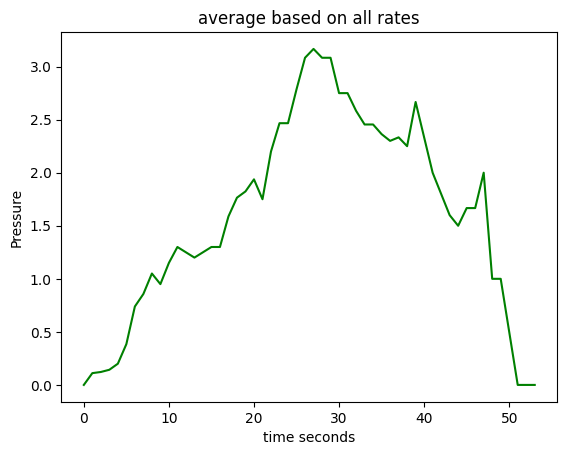

In [643]:
#to get data for the overall mean 
all_overlaps_means = []
#mean for each row
for lists in all_overlaps:
    all_overlaps_means.append(np.mean(lists))

print(all_overlaps)
all_overlaps_means = [x for x in all_overlaps_means if str(x) != 'nan']
plt.plot(all_overlaps_means, color='green')
plt.title("average based on all rates")
plt.ylabel("Pressure")
plt.xlabel("time seconds")
contecting_it = np.linspace(all_overlaps_means[0], all_overlaps_means[-1], len(all_overlaps_means), endpoint=True)
#plt.plot(contecting_it)
plt.show()
all_overlaps_means = [x for x in all_overlaps_means if str(x) != 'nan']


In [644]:
print(contecting_it)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


IMPOETANPINTS

In [645]:
all_overlaps_means

[np.float64(0.0),
 np.float64(0.1111111111111111),
 np.float64(0.12195121951219512),
 np.float64(0.14285714285714285),
 np.float64(0.2),
 np.float64(0.38461538461538464),
 np.float64(0.7391304347826086),
 np.float64(0.8571428571428571),
 np.float64(1.05),
 np.float64(0.95),
 np.float64(1.15),
 np.float64(1.3),
 np.float64(1.25),
 np.float64(1.2),
 np.float64(1.25),
 np.float64(1.3),
 np.float64(1.3),
 np.float64(1.588235294117647),
 np.float64(1.7647058823529411),
 np.float64(1.8235294117647058),
 np.float64(1.9375),
 np.float64(1.75),
 np.float64(2.2),
 np.float64(2.466666666666667),
 np.float64(2.466666666666667),
 np.float64(2.7857142857142856),
 np.float64(3.0833333333333335),
 np.float64(3.1666666666666665),
 np.float64(3.0833333333333335),
 np.float64(3.0833333333333335),
 np.float64(2.75),
 np.float64(2.75),
 np.float64(2.5833333333333335),
 np.float64(2.4545454545454546),
 np.float64(2.4545454545454546),
 np.float64(2.3636363636363638),
 np.float64(2.3),
 np.float64(2.333333333

In [646]:
all_overlaps_means

print(len(all_overlaps_means))

print(all_overlaps_means)



54
[np.float64(0.0), np.float64(0.1111111111111111), np.float64(0.12195121951219512), np.float64(0.14285714285714285), np.float64(0.2), np.float64(0.38461538461538464), np.float64(0.7391304347826086), np.float64(0.8571428571428571), np.float64(1.05), np.float64(0.95), np.float64(1.15), np.float64(1.3), np.float64(1.25), np.float64(1.2), np.float64(1.25), np.float64(1.3), np.float64(1.3), np.float64(1.588235294117647), np.float64(1.7647058823529411), np.float64(1.8235294117647058), np.float64(1.9375), np.float64(1.75), np.float64(2.2), np.float64(2.466666666666667), np.float64(2.466666666666667), np.float64(2.7857142857142856), np.float64(3.0833333333333335), np.float64(3.1666666666666665), np.float64(3.0833333333333335), np.float64(3.0833333333333335), np.float64(2.75), np.float64(2.75), np.float64(2.5833333333333335), np.float64(2.4545454545454546), np.float64(2.4545454545454546), np.float64(2.3636363636363638), np.float64(2.3), np.float64(2.3333333333333335), np.float64(2.25), np.flo

[ 0.02626169  0.09600906  0.1354534   0.14588293  0.23629934  0.53216536
  0.81363086  0.96594017  1.0126986   1.03679524  1.32336716  1.23123737
  1.22557258  1.23049189  1.31845334  1.31154165  1.6971476   1.741771
  1.9330182   1.80179325  1.96468462  2.45035239  2.44284029  2.72040404
  3.07372299  3.15551276  3.09854071  3.03199908  2.72211821  2.73476214
  2.49326758  2.46772229  2.4047916   2.31395624  2.3249774   2.26150973
  2.58587941  2.41452765  1.92943416  1.84254792  1.48610472  1.62613076
  1.56200645  1.94785667  1.50859536  0.88563203  0.79560078  0.01121958
  0.02977474 -0.02865086]
[ 1.5         0.84604605  2.08495566  3.44645265  4.04187312  5.72316747
  6.12582103  7.93694122  8.2455396  10.12844951 10.38004541 12.30965022
 12.52200894 14.48529498 14.66820869 16.65765006 16.81699958 18.82794275
 18.96744327 20.99690698 21.11895301 23.16502204 23.27112861 25.33262991
 25.42367053 27.5        27.57632947 29.66737009 29.72887139 31.83497796
 31.88104699 34.00309302 34

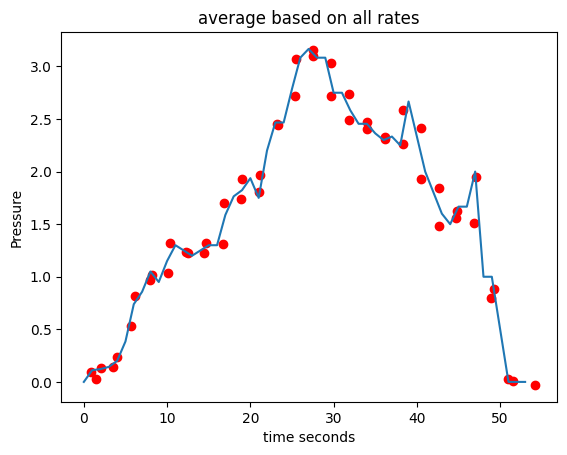

In [647]:
#to get data for the overall mean 
all_overlaps_means = []
#mean for each row
for lists in all_overlaps:
    all_overlaps_means.append(np.mean(lists))


all_overlaps_means = [x for x in all_overlaps_means if str(x) != 'nan']





resampled_y = signal.resample(all_overlaps_means, 50)
resampled_x = signal.resample(list(range(len(all_overlaps_means))), 50)
print((resampled_y))
print((resampled_x))

plt.plot(resampled_x,resampled_y,  'ro' )
#plt.plot(resampled_y,  'ro' )
print(len(all_overlaps_means))
plt.plot(all_overlaps_means )

plt.title("average based on all rates")
plt.ylabel("Pressure")
plt.xlabel("time seconds")

plt.show()

all_overlaps_means[0::10]

In [648]:
new_50 = [[x,y] for x, y in zip(resampled_x, resampled_y)]
new_50

[[np.float64(1.5), np.float64(0.026261687835657337)],
 [np.float64(0.8460460530436565), np.float64(0.09600905835575085)],
 [np.float64(2.084955657333812), np.float64(0.13545339983474614)],
 [np.float64(3.446452653435472), np.float64(0.14588293076352193)],
 [np.float64(4.041873122925964), np.float64(0.2362993360647347)],
 [np.float64(5.723167472659774), np.float64(0.532165362940137)],
 [np.float64(6.125821025129386), np.float64(0.8136308560581459)],
 [np.float64(7.93694121687269), np.float64(0.9659401696577503)],
 [np.float64(8.245539596393522), np.float64(1.0126986028549096)],
 [np.float64(10.128449506179999), np.float64(1.0367952366960442)],
 [np.float64(10.380045412080086), np.float64(1.323367161149334)],
 [np.float64(12.309650221957654), np.float64(1.2312373652488884)],
 [np.float64(12.522008943304188), np.float64(1.225572578908041)],
 [np.float64(14.485294976446873), np.float64(1.230491889812609)],
 [np.float64(14.668208694336418), np.float64(1.318453339659649)],
 [np.float64(16.65

In [649]:
# new
def get_50_avg_coordinates(path):
    
    df = pd.read_csv(path,sep = '\t')   
    pos_pressure = df["pressure"]

    neglist = [ -x for x in pos_pressure]

    # ADD THE DROPPING DWOAN AND GETMIN BELLOW a LINE
    b, a = signal.butter(1, 0.002, analog=False)
    gustafsson_avg = signal.filtfilt(b, a, x= pos_pressure, method="gust")
    y_flater = [real_pre-abs( guston_avg) for real_pre, guston_avg in zip(pos_pressure, gustafsson_avg)]

    y_flater = np.array(y_flater)
    neglist = [ -x for x in y_flater]

    neg_max_values = max(neglist)
    neg_mix_values = min(neglist)
    mid_neg_value= neg_max_values - neg_mix_values

    min_height = neg_max_values - mid_neg_value*0.15 

    min_peaks, _ = find_peaks(neglist , height= min_height)

    # juts deleted stuff from both lists if its in tht 40 range 
    # THIS IS THE MOST IMPORTANT 
    most_accurate_mins = min_peaks
    diffrences_new_min = reject_outliers(np.diff(most_accurate_mins))
    
    mean_new_min = float(diffrences_new_min.mean())
    overlapped_means = pd.DataFrame( )
    nans_list = np.full(int(mean_new_min- get_stats(diffrences_new_min)[1]), np.nan)
    
    for i in range(len(most_accurate_mins)-1):
        
        current_pulse_width = int(most_accurate_mins[i+1]) -int(most_accurate_mins[i])
        if (current_pulse_width)< get_stats(diffrences_new_min)[4] and (current_pulse_width)> get_stats(diffrences_new_min)[1]:
            y_range  = list(range(int(most_accurate_mins[i]),int(most_accurate_mins[i+1])))
            y_of_shift = [int(y - min(pos_pressure[y_range])) for y in pos_pressure[y_range]]


            start_end_line = np.linspace(y_of_shift[0], y_of_shift[-1], len(y_of_shift), endpoint=True)
            y_rotated = [xi - yi for xi, yi in zip(y_of_shift, start_end_line)]
            # print("roatte leny ",len(y_rotated))
            # print("added len " , len(list(y_rotated)[:int(mean_new_min)]), len(list(nans_list[:int(mean_new_min) - len(y_rotated)])))
            # print(int(mean_new_min) - len(y_rotated))
            
            if len(y_rotated)>=int(mean_new_min):
                overlapped_means[f"pulse {i}"] = list(y_rotated)[:int(mean_new_min)]
            else:
                overlapped_means[f"pulse {i}"] = list(y_rotated)[:int(mean_new_min)] + list(nans_list[:int(mean_new_min) - len(y_rotated)])

    # WORKS STAY LIKE TAHTA^^^^  MAKES THE MEAN THE HIGHEST VLAUE , 
    #maybe later make it wider but for now it would work the same!
    overlapped_means['mean'] = overlapped_means.mean(axis=1)
    all_overlaps_means = (overlapped_means.mean(axis=1))
    
    resampled_y = signal.resample(all_overlaps_means, 50)
    return resampled_y

In [650]:
# old
def get_50_avg_coordinates(path):
    print(path)
    df = pd.read_csv(path,sep = '\t')   
    pos_pressure = df["pressure"]

    neglist = [ -x for x in pos_pressure]

    # ADD THE DROPPING DWOAN AND GETMIN BELLOW a LINE
    min_peaks, _ = find_peaks(neglist, prominence=10,width=80 )

    print(min_peaks)    
    # juts deleted stuff from both lists if its in tht 40 range 
    # THIS IS THE MOST IMPORTANT 
    most_accurate_mins = min_peaks
    
    diffrences_new_min = reject_outliers(np.diff(most_accurate_mins))
    
    mean_new_min = float(diffrences_new_min.mean())

    overlapped_means = pd.DataFrame( )
    nans_list = np.full(int(mean_new_min- get_stats(diffrences_new_min)[1]), np.nan)
    
    for i in range(len(most_accurate_mins)-1):
        
        current_pulse_width = int(most_accurate_mins[i+1]) -int(most_accurate_mins[i])
        if (current_pulse_width)< get_stats(diffrences_new_min)[4] and (current_pulse_width)> get_stats(diffrences_new_min)[1]:
            y_range  = list(range(int(most_accurate_mins[i]),int(most_accurate_mins[i+1])))
            y_of_shift = [int(y - min(pos_pressure[y_range])) for y in pos_pressure[y_range]]


            start_end_line = np.linspace(y_of_shift[0], y_of_shift[-1], len(y_of_shift), endpoint=True)
            y_rotated = [xi - yi for xi, yi in zip(y_of_shift, start_end_line)]
            # print("roatte leny ",len(y_rotated))
            # print("added len " , len(list(y_rotated)[:int(mean_new_min)]), len(list(nans_list[:int(mean_new_min) - len(y_rotated)])))
            # print(int(mean_new_min) - len(y_rotated))
            
            if len(y_rotated)>=int(mean_new_min):
                overlapped_means[f"pulse {i}"] = list(y_rotated)[:int(mean_new_min)]
            else:
                overlapped_means[f"pulse {i}"] = list(y_rotated)[:int(mean_new_min)] + list(nans_list[:int(mean_new_min) - len(y_rotated)])

    # WORKS STAY LIKE TAHTA^^^^  MAKES THE MEAN THE HIGHEST VLAUE , 
    #maybe later make it wider but for now it would work the same!
    overlapped_means['mean'] = overlapped_means.mean(axis=1)
    all_overlaps_means = (overlapped_means.mean(axis=1))
    #print(np.isnan(all_overlaps_means))

    
    resampled_y = signal.resample(all_overlaps_means, 50)
    return resampled_y